In [1]:
import pandas as pd
import numpy as np


file_path = r"C:\Users\eKasi_SWT_COM00862\Desktop\Health_Care_Project\Health_Care_Services.csv"
df = pd.read_csv(file_path)


print("\nDataset Info:")
print(df.info())

print("\nFirst few rows of the data:")
print(df.head())

print("\nBasic statistics:")
print(df.describe())

print("\nColumns in the dataset:")
print(df.columns.tolist())

print("\nMissing values in each column:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               100 non-null    int64  
 1   Name             100 non-null    object 
 2   Task_id          100 non-null    int64  
 3   Width            100 non-null    int64  
 4   Height           100 non-null    int64  
 5   Drug Name        47 non-null     object 
 6   Dosage           42 non-null     object 
 7   Quantity         32 non-null     float64
 8   Contact number   8 non-null      float64
 9   Date Issued      100 non-null    object 
 10  Email address    15 non-null     object 
 11  Prescriber Name  48 non-null     object 
 12  sex              25 non-null     object 
 13  Age              25 non-null     object 
 14  Patient Name     76 non-null     object 
dtypes: float64(2), int64(4), object(9)
memory usage: 11.8+ KB
None

First few rows of the data:
  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def analyze_healthcare_data(df):
    """
    Comprehensive analysis of healthcare data
    """
    
    df_analysis = df.copy()
    
    
    df_analysis['Date Issued'] = pd.to_datetime(df_analysis['Date Issued'])
    
    
    results = {
        'data_quality': {},
        'temporal_analysis': {},
        'prescription_analysis': {},
        'demographic_analysis': {}
    }
    
   
    results['data_quality']['completeness'] = {
        'total_records': len(df),
        'missing_percentages': (df.isnull().sum() / len(df) * 100).round(2).to_dict()
    }
    
   
    results['temporal_analysis']['prescriptions_by_year'] = (
        df_analysis['Date Issued'].dt.year.value_counts().sort_index().to_dict()
    )
    
   
    results['prescription_analysis']['common_drugs'] = (
        df_analysis['Drug Name'].value_counts().head(5).to_dict()
    )
    results['prescription_analysis']['dosage_distribution'] = (
        df_analysis['Dosage'].value_counts().head(5).to_dict()
    )
    
   
    results['demographic_analysis']['gender_distribution'] = (
        df_analysis['sex'].value_counts().to_dict()
    )
    
    
    results['image_analysis'] = {
        'avg_width': df_analysis['Width'].mean(),
        'avg_height': df_analysis['Height'].mean(),
        'aspect_ratio_stats': {
            'mean': (df_analysis['Width'] / df_analysis['Height']).mean(),
            'std': (df_analysis['Width'] / df_analysis['Height']).std()
        }
    }
    
    return results

def plot_healthcare_insights(df):
    """
    Create visualizations for healthcare data insights
    """
    
    plt.style.use('seaborn')
    
   
    fig = plt.figure(figsize=(15, 10))
    
    
    plt.subplot(2, 2, 1)
    missing_data = df.isnull().sum().sort_values(ascending=True)
    plt.barh(range(len(missing_data)), missing_data)
    plt.yticks(range(len(missing_data)), missing_data.index)
    plt.title('Missing Values by Column')
    plt.xlabel('Number of Missing Values')
    
   
    plt.subplot(2, 2, 2)
    df['Date Issued'] = pd.to_datetime(df['Date Issued'])
    df['Year'] = df['Date Issued'].dt.year
    year_counts = df['Year'].value_counts().sort_index()
    plt.bar(year_counts.index, year_counts.values)
    plt.title('Prescriptions by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Prescriptions')
    
    
    plt.subplot(2, 2, 3)
    drug_counts = df['Drug Name'].value_counts().head(5)
    plt.pie(drug_counts, labels=drug_counts.index, autopct='%1.1f%%')
    plt.title('Top 5 Prescribed Drugs')
    
    
    plt.subplot(2, 2, 4)
    plt.scatter(df['Width'], df['Height'], alpha=0.5)
    plt.title('Image Dimensions Distribution')
    plt.xlabel('Width')
    plt.ylabel('Height')
    
    plt.tight_layout()
    return fig


HEALTHCARE DATA ANALYSIS REPORT

1. DATA QUALITY ANALYSIS:
Total Records: 100

Missing Data Percentages:
  Id: 0.0%
  Name: 0.0%
  Task_id: 0.0%
  Width: 0.0%
  Height: 0.0%
  Drug Name: 53.0%
  Dosage: 58.0%
  Quantity: 68.0%
  Contact number: 92.0%
  Date Issued: 0.0%
  Email address: 85.0%
  Prescriber Name: 52.0%
  sex: 2.0%
  Age: 0.0%
  Patient Name: 22.0%

2. TEMPORAL ANALYSIS:
Prescriptions by Year:
  Year 1993: 1 prescriptions
  Year 1994: 1 prescriptions
  Year 1995: 1 prescriptions
  Year 1996: 6 prescriptions
  Year 1997: 32 prescriptions
  Year 1998: 2 prescriptions
  Year 1999: 2 prescriptions
  Year 2000: 5 prescriptions
  Year 2001: 2 prescriptions
  Year 2002: 2 prescriptions
  Year 2003: 1 prescriptions
  Year 2004: 2 prescriptions
  Year 2005: 5 prescriptions
  Year 2006: 5 prescriptions
  Year 2007: 7 prescriptions
  Year 2008: 2 prescriptions
  Year 2009: 3 prescriptions
  Year 2010: 6 prescriptions
  Year 2011: 5 prescriptions
  Year 2012: 1 prescriptions
  Year 

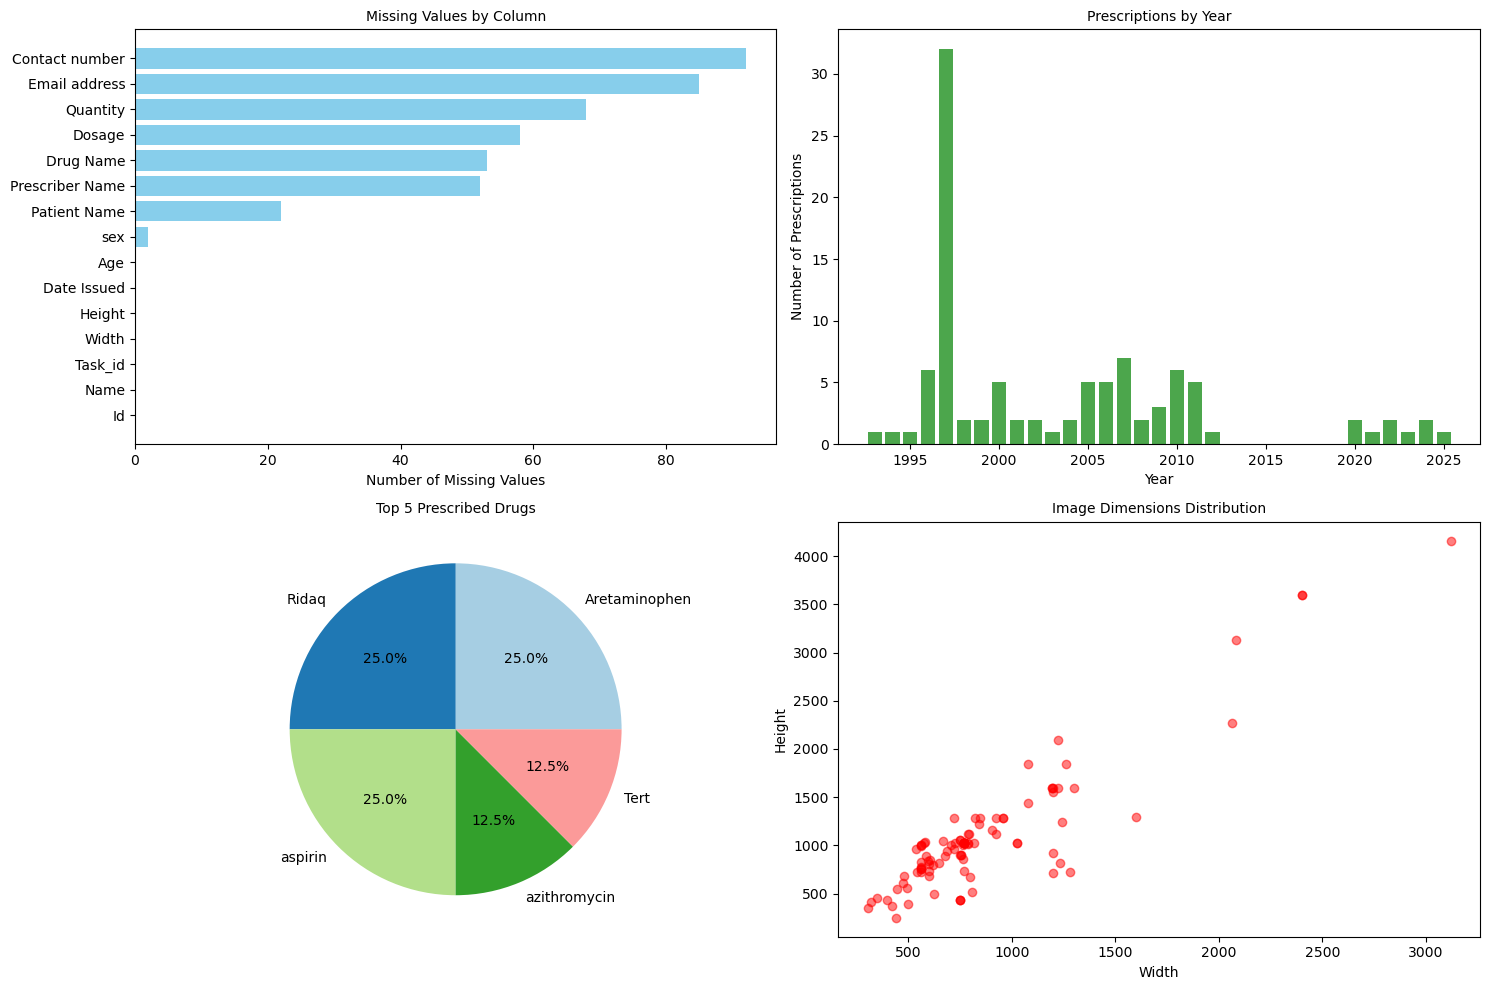

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def analyze_healthcare_data(df):
    """
    Comprehensive analysis of healthcare data
    """
    # Create a copy to avoid modifications to original data
    df_analysis = df.copy()
    
    # Convert Date Issued to datetime with mixed format and dayfirst=True
    df_analysis['Date Issued'] = pd.to_datetime(df_analysis['Date Issued'], format='mixed', dayfirst=True)
    
    # Analysis results dictionary
    results = {
        'data_quality': {},
        'temporal_analysis': {},
        'prescription_analysis': {},
        'demographic_analysis': {}
    }
    
    # 1. Data Quality Analysis
    results['data_quality']['completeness'] = {
        'total_records': len(df),
        'missing_percentages': (df.isnull().sum() / len(df) * 100).round(2).to_dict()
    }
    
    # 2. Temporal Analysis
    results['temporal_analysis']['prescriptions_by_year'] = (
        df_analysis['Date Issued'].dt.year.value_counts().sort_index().to_dict()
    )
    
    # 3. Prescription Analysis
    results['prescription_analysis']['common_drugs'] = (
        df_analysis['Drug Name'].value_counts().head(5).to_dict()
    )
    results['prescription_analysis']['dosage_distribution'] = (
        df_analysis['Dosage'].value_counts().head(5).to_dict()
    )
    
    # 4. Demographic Analysis
    results['demographic_analysis']['gender_distribution'] = (
        df_analysis['sex'].value_counts().to_dict()
    )
    
    # 5. Image Dimensions Analysis
    results['image_analysis'] = {
        'avg_width': df_analysis['Width'].mean(),
        'avg_height': df_analysis['Height'].mean(),
        'aspect_ratio_stats': {
            'mean': (df_analysis['Width'] / df_analysis['Height']).mean(),
            'std': (df_analysis['Width'] / df_analysis['Height']).std()
        }
    }
    
    return results

def plot_healthcare_insights(df):
    """
    Create visualizations for healthcare data insights
    """
    # Convert dates with mixed format
    df['Date Issued'] = pd.to_datetime(df['Date Issued'], format='mixed', dayfirst=True)
    
    # Create a figure with multiple subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Missing Values Plot
    missing_data = df.isnull().sum().sort_values(ascending=True)
    axs[0, 0].barh(range(len(missing_data)), missing_data, color='skyblue')
    axs[0, 0].set_yticks(range(len(missing_data)))
    axs[0, 0].set_yticklabels(missing_data.index)
    axs[0, 0].set_title('Missing Values by Column', fontsize=10)
    axs[0, 0].set_xlabel('Number of Missing Values')
    
    # 2. Temporal Distribution
    df['Year'] = df['Date Issued'].dt.year
    year_counts = df['Year'].value_counts().sort_index()
    axs[0, 1].bar(year_counts.index, year_counts.values, color='green', alpha=0.7)
    axs[0, 1].set_title('Prescriptions by Year', fontsize=10)
    axs[0, 1].set_xlabel('Year')
    axs[0, 1].set_ylabel('Number of Prescriptions')
    
    # 3. Drug Distribution (Top 5)
    drug_counts = df['Drug Name'].value_counts().head(5)
    axs[1, 0].pie(drug_counts, labels=drug_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired(np.arange(len(drug_counts))))
    axs[1, 0].set_title('Top 5 Prescribed Drugs', fontsize=10)
    
    # 4. Image Dimensions Scatter
    axs[1, 1].scatter(df['Width'], df['Height'], alpha=0.5, color='red')
    axs[1, 1].set_title('Image Dimensions Distribution', fontsize=10)
    axs[1, 1].set_xlabel('Width')
    axs[1, 1].set_ylabel('Height')
    
    plt.tight_layout()
    return fig

# Load the data
file_path = r"C:\Users\eKasi_SWT_COM00862\Desktop\Health_Care_Project\Health_Care_Services.csv"
df = pd.read_csv(file_path)

# Run the analysis
results = analyze_healthcare_data(df)

# Print the analysis results with enhanced readability
print("\n" + "=" * 50)
print("HEALTHCARE DATA ANALYSIS REPORT")
print("=" * 50)

print("\n1. DATA QUALITY ANALYSIS:")
print(f"Total Records: {results['data_quality']['completeness']['total_records']}")
print("\nMissing Data Percentages:")
for column, percentage in results['data_quality']['completeness']['missing_percentages'].items():
    print(f"  {column}: {percentage}%")

print("\n2. TEMPORAL ANALYSIS:")
print("Prescriptions by Year:")
for year, count in results['temporal_analysis']['prescriptions_by_year'].items():
    print(f"  Year {year}: {count} prescriptions")

print("\n3. PRESCRIPTION ANALYSIS:")
print("Top 5 Most Common Drugs:")
for drug, count in results['prescription_analysis']['common_drugs'].items():
    print(f"  {drug}: {count}")

print("\n4. DEMOGRAPHIC ANALYSIS:")
print("Gender Distribution:")
for gender, count in results['demographic_analysis']['gender_distribution'].items():
    print(f"  {gender}: {count}")

print("\n5. IMAGE ANALYSIS:")
print(f"  Average Width: {results['image_analysis']['avg_width']:.2f}")
print(f"  Average Height: {results['image_analysis']['avg_height']:.2f}")

# Create and display the visualizations
fig = plot_healthcare_insights(df)
plt.show()